In [3840]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, norm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OrdinalEncoder
#gain authorization to gdrive

from google.colab import drive
drive.mount('/content/gdrive')

!ls '/content/gdrive/My Drive/MscBigData/SD_CW/AmesHousing.txt'
!cat '/content/gdrive/My Drive/MscBigData/SD_CW/AmesHousing.txt'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'/content/gdrive/My Drive/MscBigData/SD_CW/AmesHousing.txt'
Order	PID	MS SubClass	MS Zoning	Lot Frontage	Lot Area	Street	Alley	Lot Shape	Land Contour	Utilities	Lot Config	Land Slope	Neighborhood	Condition 1	Condition 2	Bldg Type	House Style	Overall Qual	Overall Cond	Year Built	Year Remod/Add	Roof Style	Roof Matl	Exterior 1st	Exterior 2nd	Mas Vnr Type	Mas Vnr Area	Exter Qual	Exter Cond	Foundation	Bsmt Qual	Bsmt Cond	Bsmt Exposure	BsmtFin Type 1	BsmtFin SF 1	BsmtFin Type 2	BsmtFin SF 2	Bsmt Unf SF	Total Bsmt SF	Heating	Heating QC	Central Air	Electrical	1st Flr SF	2nd Flr SF	Low Qual Fin SF	Gr Liv Area	Bsmt Full Bath	Bsmt Half Bath	Full Bath	Half Bath	Bedroom AbvGr	Kitchen AbvGr	Kitchen Qual	TotRms AbvGrd	Functional	Fireplaces	Fireplace Qu	Garage Type	Garage Yr Blt	Garage Finish	Garage Cars	Garage Area	Garage Qual	Garage Cond	Paved Drive	Wood Deck SF	Open Porc

# Preprocessing of the raw data file:

---



Import all necessary packages for the EDA. Open connection to gdrive to load in the file. find file using !LS command and !CAT reads file to ensure its all there. 

In [3841]:
Fpath = '/content/gdrive/My Drive/MscBigData/SD_CW/AmesHousing.txt'
df = pd.read_csv(Fpath)
display(df.head())
print('\n')
display(df.tail())
print('\n')
display(df.shape)
print('\n')
df

,Order\tPID\tMS SubClass\tMS Zoning\tLot Frontage\tLot Area\tStreet\tAlley\tLot Shape\tLand Contour\tUtilities\tLot Config\tLand Slope\tNeighborhood\tCondition 1\tCondition 2\tBldg Type\tHouse Style\tOverall Qual\tOverall Cond\tYear Built\tYear Remod/Add\tRoof Style\tRoof Matl\tExterior 1st\tExterior 2nd\tMas Vnr Type\tMas Vnr Area\tExter Qual\tExter Cond\tFoundation\tBsmt Qual\tBsmt Cond\tBsmt Exposure\tBsmtFin Type 1\tBsmtFin SF 1\tBsmtFin Type 2\tBsmtFin SF 2\tBsmt Unf SF\tTotal Bsmt SF\tHeating\tHeating QC\tCentral Air\tElectrical\t1st Flr SF\t2nd Flr SF\tLow Qual Fin SF\tGr Liv Area\tBsmt Full Bath\tBsmt Half Bath\tFull Bath\tHalf Bath\tBedroom AbvGr\tKitchen AbvGr\tKitchen Qual\tTotRms AbvGrd\tFunctional\tFireplaces\tFireplace Qu\tGarage Type\tGarage Yr Blt\tGarage Finish\tGarage Cars\tGarage Area\tGarage Qual\tGarage Cond\tPaved Drive\tWood Deck SF\tOpen Porch SF\tEnclosed Porch\t3Ssn Porch\tScreen Porch\tPool Area\tPool QC\tFence\tMisc Feature\tMisc Val\tMo Sold\tYr Sold\tSale Type\tSale Condition\tSalePrice
0,1\t0526301100\t020\tRL\t141\t31770\tPave\tNA\t...
1,2\t0526350040\t020\tRH\t80\t11622\tPave\tNA\tR...
2,3\t0526351010\t020\tRL\t81\t14267\tPave\tNA\tI...
3,4\t0526353030\t020\tRL\t93\t11160\tPave\tNA\tR...
4,5\t0527105010\t060\tRL\t74\t13830\tPave\tNA\tI...


,Order\tPID\tMS SubClass\tMS Zoning\tLot Frontage\tLot Area\tStreet\tAlley\tLot Shape\tLand Contour\tUtilities\tLot Config\tLand Slope\tNeighborhood\tCondition 1\tCondition 2\tBldg Type\tHouse Style\tOverall Qual\tOverall Cond\tYear Built\tYear Remod/Add\tRoof Style\tRoof Matl\tExterior 1st\tExterior 2nd\tMas Vnr Type\tMas Vnr Area\tExter Qual\tExter Cond\tFoundation\tBsmt Qual\tBsmt Cond\tBsmt Exposure\tBsmtFin Type 1\tBsmtFin SF 1\tBsmtFin Type 2\tBsmtFin SF 2\tBsmt Unf SF\tTotal Bsmt SF\tHeating\tHeating QC\tCentral Air\tElectrical\t1st Flr SF\t2nd Flr SF\tLow Qual Fin SF\tGr Liv Area\tBsmt Full Bath\tBsmt Half Bath\tFull Bath\tHalf Bath\tBedroom AbvGr\tKitchen AbvGr\tKitchen Qual\tTotRms AbvGrd\tFunctional\tFireplaces\tFireplace Qu\tGarage Type\tGarage Yr Blt\tGarage Finish\tGarage Cars\tGarage Area\tGarage Qual\tGarage Cond\tPaved Drive\tWood Deck SF\tOpen Porch SF\tEnclosed Porch\t3Ssn Porch\tScreen Porch\tPool Area\tPool QC\tFence\tMisc Feature\tMisc Val\tMo Sold\tYr Sold\tSale Type\tSale Condition\tSalePrice
2925,2926\t0923275080\t080\tRL\t37\t7937\tPave\tNA\...
2926,2927\t0923276100\t020\tRL\t\t8885\tPave\tNA\tI...
2927,2928\t0923400125\t085\tRL\t62\t10441\tPave\tNA...
2928,2929\t0924100070\t020\tRL\t77\t10010\tPave\tNA...
2929,2930\t0924151050\t060\tRL\t74\t9627\tPave\tNA\...


(2930, 1)

,Order\tPID\tMS SubClass\tMS Zoning\tLot Frontage\tLot Area\tStreet\tAlley\tLot Shape\tLand Contour\tUtilities\tLot Config\tLand Slope\tNeighborhood\tCondition 1\tCondition 2\tBldg Type\tHouse Style\tOverall Qual\tOverall Cond\tYear Built\tYear Remod/Add\tRoof Style\tRoof Matl\tExterior 1st\tExterior 2nd\tMas Vnr Type\tMas Vnr Area\tExter Qual\tExter Cond\tFoundation\tBsmt Qual\tBsmt Cond\tBsmt Exposure\tBsmtFin Type 1\tBsmtFin SF 1\tBsmtFin Type 2\tBsmtFin SF 2\tBsmt Unf SF\tTotal Bsmt SF\tHeating\tHeating QC\tCentral Air\tElectrical\t1st Flr SF\t2nd Flr SF\tLow Qual Fin SF\tGr Liv Area\tBsmt Full Bath\tBsmt Half Bath\tFull Bath\tHalf Bath\tBedroom AbvGr\tKitchen AbvGr\tKitchen Qual\tTotRms AbvGrd\tFunctional\tFireplaces\tFireplace Qu\tGarage Type\tGarage Yr Blt\tGarage Finish\tGarage Cars\tGarage Area\tGarage Qual\tGarage Cond\tPaved Drive\tWood Deck SF\tOpen Porch SF\tEnclosed Porch\t3Ssn Porch\tScreen Porch\tPool Area\tPool QC\tFence\tMisc Feature\tMisc Val\tMo Sold\tYr Sold\tSale Type\tSale Condition\tSalePrice
0,1\t0526301100\t020\tRL\t141\t31770\tPave\tNA\t...
1,2\t0526350040\t020\tRH\t80\t11622\tPave\tNA\tR...
2,3\t0526351010\t020\tRL\t81\t14267\tPave\tNA\tI...
3,4\t0526353030\t020\tRL\t93\t11160\tPave\tNA\tR...
4,5\t0527105010\t060\tRL\t74\t13830\tPave\tNA\tI...
...,...
2925,2926\t0923275080\t080\tRL\t37\t7937\tPave\tNA\...
2926,2927\t0923276100\t020\tRL\t\t8885\tPave\tNA\tI...
2927,2928\t0923400125\t085\tRL\t62\t10441\tPave\tNA...
2928,2929\t0924100070\t020\tRL\t77\t10010\tPave\tNA...


Save the file path to the dataset creating a simple Pandas DataFrame to hold the data. Use head() and tail() to get a simple overall look at the data. The data is in poor shape and is currently unworkable. We see a shape of 2930,1 suggesting a tall data structure, data is separated using /t (escape characer for Tab).Columns are grouped in a single column.

In [3842]:
na_val = ['n/a', 'N/A' 'na', 'NaN' '--']
ams = pd.read_csv(Fpath,sep="\t", header =0, na_values=na_val)
ams.columns = ams.columns.str.replace(' ', '')
print('\n')
display(ams.head())
print('\n')
display(ams.tail())

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,...,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,...,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,...,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,1071.0,LwQ,123.0,195.0,1389.0,...,Y,SBrkr,1389,0,0,1389,1.0,0.0,1,0,2,1,TA,6,Typ,1,TA,Attchd,1975.0,RFn,2.0,418.0,TA,TA,Y,240,38,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,...,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


Add a list to cover any instances of N/A pandas may miss [[1]]. Covert raw DataFrame to DataFrame ams, specify split using the \t to separate the txt file into appropriate rows and columns. Replace whitespace for easy referencing. Header = 0 is crucial as it maps the rows to the appropriate dtypes as well as set up column headers. Visualisation shows "Order" would match index in the dataset.

[1]: https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

In [3843]:
ams.head()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Columns and index set, dataset is in a more readable state and insight can be gained. Structured dataset of 2390,82, appropriate dtypes assigned.

In [3844]:
print(ams.dtypes.to_string())

Order              int64
PID                int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemod/Add      int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64


Dataset can be a summarised as a series of categorical and numerical features, dtypes of object, int, float. Large feature selection so grouping of related features in visualisation is required to get an idea of the relationships and insights that exist within the dataset.

# Cleaning of Data:

Dealing with nulls:

In [3845]:
tot = ams.isnull().sum().sort_values(ascending=False)
per = (ams.isnull().sum()/ams.isnull().count()*100).sort_values(ascending=False)
null_df = pd.concat([tot, per], axis=1, keys=['Total', 'Percent'])
display(null_df.head(27))

,Total,Percent
PoolQC,2917,99.556314
MiscFeature,2824,96.382253
Alley,2732,93.242321
Fence,2358,80.477816
FireplaceQu,1422,48.532423
LotFrontage,490,16.723549
GarageQual,159,5.426621
GarageYrBlt,159,5.426621
GarageCond,159,5.426621
GarageFinish,159,5.426621


Var tot is calculated through the number of null values in ams in descending order (greatest to least). Var per calculates the percentage of nulls to the overall length of the rows and the two panda series objects are added together to form a null dataframe. Results order by most significant and indicate Pool CQ, Misc Feature Alley, Fence all contain 80% or higher null values. Values will likely correlate to having none of the object, however, the features dont seem to provide much insight looking at the observations and will heavily skew.

In [3846]:
ams.drop(['Alley','Fence','PoolQC','MiscFeature'], axis=1, inplace=True)

features containing 80% of null values are dropped from the DataFrame by the column axis and inplace =True updates the dataframe rather than return simply a copy.

In [3847]:
ams['FireplaceQu'].value_counts()
ams['FireplaceQu'].fillna("None", inplace=True)

Offical documentation for the dataset lists all NA values to equal No Fireplace. Replace all NA values to equal "None"

In [3848]:
ams['LotFrontage'].describe()

count    2440.000000
mean       69.224590
std        23.365335
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Lot Frontage is the linear feet of street connected to property, missing values could be replaced by the logical assumption that each property within a set neighborhood has a similar area.

Missing values are replaced with the median of LotFrontage corresponding to the neighborhood of the property, an advantage of this is that the median is not affected by any outliers like the mean would be. This is accomplished using the lambda (non-defined) function on x to replace all NA values with the median set by the grouping. The results are reformed back into the intital Dataframe column with the transformed values. [3]

[3]: https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

In [3849]:
ams['LotFrontage'] = ams.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [3850]:
gar_group = ams[['GarageQual', 'GarageYrBlt', 'GarageCond', 'GarageFinish', 'GarageType','GarageArea','GarageCars']]
gar_group.head()

,GarageQual,GarageYrBlt,GarageCond,GarageFinish,GarageType,GarageArea,GarageCars
0,TA,1960.0,TA,Fin,Attchd,528.0,2.0
1,TA,1961.0,TA,Unf,Attchd,730.0,1.0
2,TA,1958.0,TA,Unf,Attchd,312.0,1.0
3,TA,1968.0,TA,Fin,Attchd,522.0,2.0
4,TA,1997.0,TA,Fin,Attchd,482.0,2.0


In [3851]:
ams[['GarageQual', 'GarageCond', 'GarageFinish', 'GarageType']] = ams[['GarageQual', 'GarageCond', 'GarageFinish', 'GarageType']].fillna('None')
ams[['GarageArea', 'GarageCars']] = ams[['GarageArea', 'GarageCars']].fillna(0)

In [3852]:
ams['GarageYrBlt'].dropna(inplace=True)

All garage features state NA is equal to not a garage. However, GarageYrBlt does not follow the same pattern as the other garage features. Years cannot be replaced with the 0 or the median or mean and still maintain validity so these occurences will be dropped.

In [3853]:
bas_group = ams[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF', 'BsmtUnfSF','BsmtFinSF1', 'BsmtFinSF2']]
bas_group.head()

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtFullBath,BsmtHalfBath,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1,BsmtFinSF2
0,Gd,Unf,BLQ,Gd,TA,1.0,0.0,1080.0,441.0,639.0,0.0
1,No,LwQ,Rec,TA,TA,0.0,0.0,882.0,270.0,468.0,144.0
2,No,Unf,ALQ,TA,TA,0.0,0.0,1329.0,406.0,923.0,0.0
3,No,Unf,ALQ,TA,TA,1.0,0.0,2110.0,1045.0,1065.0,0.0
4,No,Unf,GLQ,TA,Gd,0.0,0.0,928.0,137.0,791.0,0.0


In [3854]:
ams[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']] = ams[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']].fillna('None')
ams[['BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF','TotalBsmtSF', 'BsmtUnfSF','BsmtFinSF1','BsmtFinSF2']] = ams[['BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF','TotalBsmtSF', 'BsmtUnfSF','BsmtFinSF1','BsmtFinSF2']].fillna(0)

Separate relatable features of Basement:

An insight when reviewing this set of data, BsmtExposure, BsmtCond, BsmtQual all feature the same 'ranking' categories similar to FireplaceQu and seems to be a method of categorizing throughout the dataset.

 Documentation shows that NA means there is no basement. All our features fall under this logic. 'None' is used for objects and '0' for numerical.

In [3855]:
mas_group = ams[['MasVnrType','MasVnrArea']]
mas_group.head()

ams['MasVnrType'].fillna('None', inplace=True)
ams['MasVnrArea'].fillna(0, inplace=True)

NA values are likely to represent that the property doesnt contain masonsry veneer walls so objects will be 'None' and numerical will be 0.

In [3856]:
ams.dropna(inplace=True)
ams.isnull().sum().sum()

0

In [3857]:
ams['GarageYrBlt'] = (ams['GarageYrBlt']).astype('int64')

Remove any stray null values in the other columns or ones missed during replacement techniques.The dataset contains no null values. Change the GarageYrBlt variable to int rather than floating point.

# Target Variable Analysis:

### Logical variables which would reflect housing price:

*  'Neighborhood': Location is always considered one of the key factors in housing.
*   Overall Qual: Better quality housing justifies an increase in the asking price, 'Overall Cond strongly relates to this.
*   Gr Liv Area: Larger houses suggest a upwards trend in the cost as such 'Mas Vnr Area' is connected.
*   Usual amenities, bathrooms, bedrooms, size of garage.



In [3858]:
display(ams['SalePrice'].describe())
display(stats.mode(ams['SalePrice']))

count      2767.000000
mean     185066.864474
std       79608.830019
min       12789.000000
25%      132750.000000
50%      165000.000000
75%      217000.000000
max      755000.000000
Name: SalePrice, dtype: float64

ModeResult(mode=array([135000]), count=array([33]))

Lowest property values sit at 12,789 compared to the significant increase to 755,000 at the higher spectrum. The mode seems to fall under the mean and median suggesting positive skewness due to the presense of outliers in the distribution which supports the diverse range in the max and min values.

In [ ]:
fig = plt.figure()
plt.title('Sales Price Histogram', fontsize=16)
fig.set_figheight(8)
fig.set_figwidth(17)
sns.set_theme(context='notebook',style='ticks')
sns.histplot(ams['SalePrice'], kde=True, color='darkblue')
plt.xlabel('Sales Price')
sns.despine()
plt.show()

Default seaborn visualisation does not visualise well so we set the figure using matplotlib. The kernal density estimation (KDE) allows emphasise on the shape of our data, where density of points lie. The visualisation supports that our data does not follow a gaussian distribution, has positive skewness and shows peaks.

In [3860]:
print('Positive Skew:', ams['SalePrice'].skew())
print('Kurtosis/Peak:', ams['SalePrice'].kurtosis())

Positive Skew: 1.7772960618098783
Kurtosis/Peak: 5.215923026772001


This can be confirmed using pandas built in skew and kurtosis methods. Skewness greater than 1 is positively skewed as such the mean and median will be greater than the mode which supports our statistical outcome as well as the visualisation. Kurtosis greater than 3 (gaussian distribution kurtosis) and as such has a high peak, suggests data is heavy tailed when looking at the optimal gaussian distribution, likely due to outliers [[2]].

[2]: SOURCE:https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.set_theme(context='notebook',style='ticks')
sns.regplot(x='GrLivArea', y='SalePrice', data=ams, ax=ax,color='red',marker='.') 
ax.set_title('Looking for Outliers', fontsize=16);
ax.set_xlabel('Grand Living Area')
ax.set_ylabel('Sales Price\n')
sns.despine()
plt.show()

Quick plot comparing Gr Liv Area and SalePrice shows possible outliers in the data sample [[3]]. From this plot we can clearly see 5 outliers, 3 of which do not reflect the actual market value (large properties with a low sale price). The last 2 lie outwith of the expected sales model but are following a linear trend so these will remain within the dataset.

[3]: http://jse.amstat.org/v19n3/decock.pdf


In [3862]:
ams.drop(ams[ams['GrLivArea'] > 4000].index, inplace = True) 

Removal of outliers highlighted in the previous plot as they are likely to skew our findings and present a bias representation of the dataset.

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.set_theme(context='notebook',style='ticks')
sns.regplot(x='GrLivArea', y='SalePrice', data=ams, ax=ax,color='green',marker='o') 
ax.set_title('Removal Of Outliers', fontsize=16);
ax.set_xlabel('Ground Living Area')
ax.set_ylabel('Sales Price\n')
sns.despine()
plt.show()

Data points are clustered and there is less variance due to removal of outliers. A linear relationship between SalePrice and GrLivArea can be seen through the visualisation using a regplot [[4]]. These is a trend in the increase in sales price per square feet of housing, this is an expected relationship when looking at housing.

[4]: https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-4-9b0119887130

In [3864]:
ams['OverallQual'].describe()

count    2762.000000
mean        6.171977
std         1.373326
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

Most properties fall under the average overall quality, range 5-7 with a smaller range on the lower and higher spectrum.

In [ ]:
f, ax = plt.subplots(figsize=(20, 9))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=ams, palette='Paired')
sns.set_theme(context='notebook',style='white')
fig.axis(ymin=0, ymax=700000);
ax.set_ylabel('Sales Price', fontsize=14)
ax.set_xlabel('Overall Quality', fontsize=14)
plt.title("Sales Price Vs Overall Quality", size=16)
plt.show()

An assumption is that the higher the quality of the property the greater the sale price, so that SalePrice has a strong linear relationship with OverallQual. The boxplot confirms this as there is clear correlation in higher quality housing selling for greater values, we see a few likely outliers especially in the higher qualities, higher quality but an extremely low sale price which does not match the summarised trends seen so far. We can also conclude that since no aggregate function should be performed on this feature, it really is telling a ranking of houses rather than some numerical value, so falls under categorical variables.

In [ ]:
f, ax = plt.subplots(figsize=(20, 9))
fig= sns.boxplot(x='OverallQual', y='SalePrice', hue='OverallCond',data=ams, palette='Paired')
sns.set_theme(context='notebook',style='white')
sns.set_style("ticks")
fig.axis(ymin=0, ymax=650000);
ax.set_ylabel('Sales Price', fontsize=14)
ax.set_xlabel('Overall Quality', fontsize=14)
plt.title('Sales Prices comparing Housing Standards', size=16)
plt.show()

Looking further into these relationships, results show that surprisingly overall condition does not necessarily equate to only the highest ranges of OverallQual.

Overall Condition does appear to be spread broadly throughout the dataset, especially around the median of OverallQual. This logically makes some sense as the OverallCond speaks of the condition that the house is in, this categorisation can fall under most properties. An important distinction when understanding this visualisation is the factors causing these features are unclear so knowing the mechanism behind the rankings could better explain the relationship.

Regarding the outliers on the previous plot, despite the OverallQual of the lower cost housing being high, the condition is poor so this could explain the lower pricing compared to expected trends. Further investigation into this observation could lead to an explanation or to confirm this is indeed an outlier.

In [3867]:
ams.loc[(ams['OverallQual'] == 9) & (ams['SalePrice'] <200000)]

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,533350090,60,RL,80.0,24572,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,1Fam,2Story,9,3,1977,1977,Mansard,CompShg,Wd Sdng,Wd Sdng,BrkFace,1050.0,Gd,Gd,CBlock,Gd,TA,No,GLQ,410.0,Unf,0.0,584.0,994.0,GasA,TA,Y,SBrkr,1599,1345,0,2944,0.0,0.0,2,2,3,1,Gd,9,Typ,1,Gd,Attchd,1977,RFn,3.0,864.0,TA,TA,Y,140,70,16,0,0,0,0,6,2008,WD,Family,150000


Our outlier is revealed. Interesting we see a few other surprising observations for this property. The property has several bathrooms, bedrooms and is of a reasonable size so aggregate market value is clearly skewed here. The solution to this may lie within our SalesCondition column. Here we see "Family" sothis property valuation does not reflect all market value. In fact, hidden within the datset descriptor, the author has advised these occurences be removed. The other suggestion is for foreclosures.

In [3868]:
mask1 = ams.loc[(ams['SaleCondition'] == 'Family')].index
mask2 = ams.loc[(ams['SaleCondition'] == 'Abnorml')].index
ams.drop(mask1, inplace=True)
ams.drop(mask2, inplace=True)
ams.shape

(2556, 78)

# Other Trends:

## Metric Analysis:

In [ ]:
fig = plt.figure()
sns.set_theme(context='notebook',style='ticks')
fig.subplots_adjust(hspace=0.5, wspace=0.2)
fig.set_figheight(8)
fig.set_figwidth(20)

ax = fig.add_subplot(2, 2, 1)
plt.title('Basement Area vs Sales Price', y=1.05, fontsize=14)
sns.scatterplot(x=ams['TotalBsmtSF'],y=ams['SalePrice'],data=ams,ax=ax, color='green')
ax.set_ylabel('Sales Price\n', fontsize=14)

ax = fig.add_subplot(2, 2, 2)
plt.title('Ground Surface Area vs Basement Area',y=1.05, fontsize=14)
sns.scatterplot(x=ams['TotalBsmtSF'],y=ams['GrLivArea'],data=ams, ax=ax, color='red')
ax.set_ylabel('Ground SA', fontsize=14)

ax = fig.add_subplot(2, 2, 3)
plt.title("1st Floor Area vs Sales Price",y=1.05, fontsize=14)
sns.scatterplot(x=ams['1stFlrSF'],y=ams['SalePrice'],data=ams,ax=ax, color='blue')
ax.set_ylabel('Sales Price\n', fontsize=14)

ax = fig.add_subplot(2, 2, 4)
plt.title('2nd Floor Area vs Sales Price',y=1.05, fontsize=14)
sns.scatterplot(x=ams['2ndFlrSF'],y=ams['SalePrice'],data=ams, ax=ax, color='purple')
ax.set_ylabel('Sales Price', fontsize=14)
sns.despine()
plt.show()

Several insights can be seen from these visualisations:

All seem to have a positively correlated relationship with SalePrice, certain features more so than others like TotalBsmtSF over 2ndFlrSF, this can be explained by the understanding that many of these properties dont contain a second floor or even a basement. FirstFlrSF shows positive lineary with SalePrice and again this insight makes sense, already the data highlights distance area per square feet affects the pricing of a property.

The data also highlights a hidden relationship between TotalBsmtSF and Gr Liv Area. We see many data points coincide with each other. Logically this makes sense, the average size of the upper area of a house would match or be similar to that of the basement total surface area, it is extremely unlikely for someone to have a bigger basement area even when looking at renovation.



## Amendities Analysis:

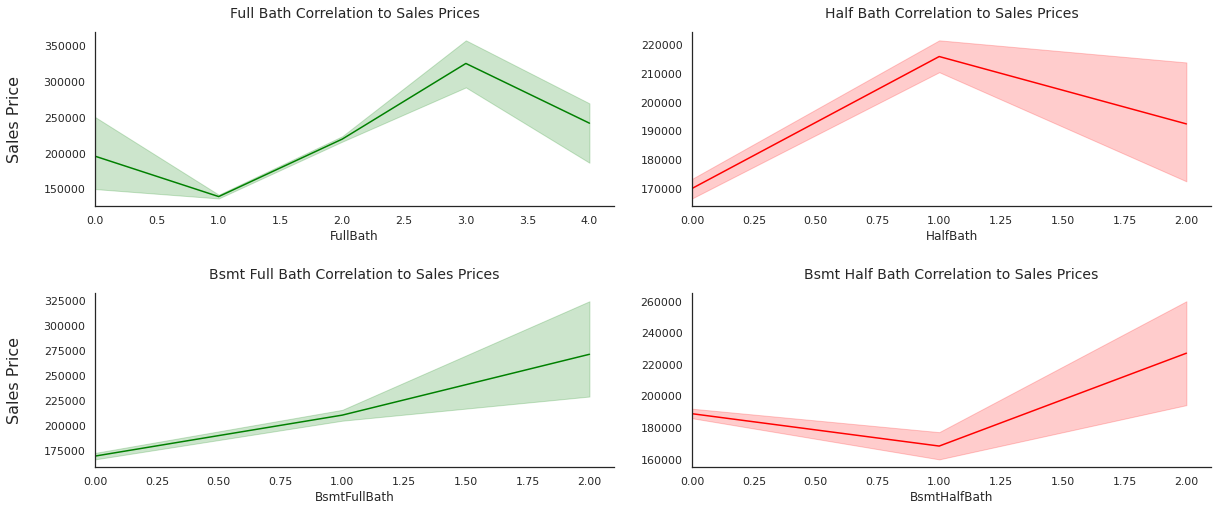

In [ ]:
fig = plt.figure()
sns.set_theme(context='notebook',style='white')
fig.subplots_adjust(hspace=0.5, wspace=0.15)
fig.set_figheight(8)
fig.set_figwidth(20)

ax = fig.add_subplot(2, 2, 1)
plt.title('Full Bath Correlation to Sales Prices', y=1.05, fontsize=14)
sns.lineplot(x=ams['FullBath'],y=ams['SalePrice'],data=ams,ax=ax, color='green')
ax.set_xlim(0,None)
ax.set_ylabel('Sales Price\n', fontsize=16)

ax = fig.add_subplot(2, 2, 2)
plt.title('Half Bath Correlation to Sales Prices' ,y=1.05, fontsize=14)
sns.lineplot(x=ams['HalfBath'],y=ams['SalePrice'],data=ams,ax=ax, color='red')
ax.set_xlim(0,None)
ax.set_ylabel('') 

ax = fig.add_subplot(2, 2, 3)
plt.title('Bsmt Full Bath Correlation to Sales Prices',y=1.05, fontsize=14)
sns.lineplot(x=ams['BsmtFullBath'],y=ams['SalePrice'],data=ams,ax=ax, color='green')
ax.set_xlim(0,None)
ax.set_ylabel('Sales Price\n', fontsize=16)

ax = fig.add_subplot(2, 2, 4)
plt.title('Bsmt Half Bath Correlation to Sales Prices' ,y=1.05, fontsize=14)
sns.lineplot(x=ams['BsmtHalfBath'],y=ams['SalePrice'],data=ams,ax=ax, color='red')
ax.set_xlim(0,None)
ax.set_ylabel('')  
sns.despine()
plt.show()

In [3871]:
display(ams['FullBath'].corr(ams['SalePrice']))
display(ams['HalfBath'].corr(ams['SalePrice']))
display(ams['BsmtFullBath'].corr(ams['SalePrice']))
display(ams['BsmtHalfBath'].corr(ams['SalePrice']))

ams['Bathrooms'] = ams['FullBath'] + (0.5*ams['HalfBath']) + ams['BsmtFullBath'] + (0.5*ams['BsmtHalfBath'])

0.5485543580747817

0.27338637880994965

0.2799395134040394

-0.055945310017121726

Amendities such as bathrooms should in theory reflect a relationship with sales price as these are desirable assets when looking for properties and extras are considered luxury items. Correlated against SalePrice, there is clearly some link, increasingly with FullBath. Collective grouping of the Bath features as a single feature Bathrooms hypothetically following our correlation results should result in higher correlation to our target variable.

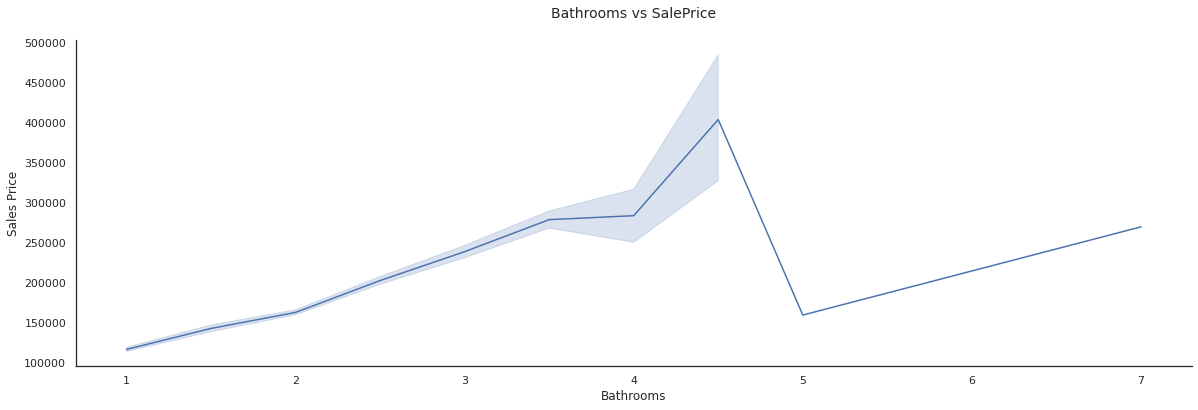

0.6448856948995273

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.title('Bathrooms vs SalePrice' ,y=1.05, fontsize=14)
sns.lineplot(x=ams['Bathrooms'],y=ams['SalePrice'],data=ams)
ax.set_xlabel('Bathrooms')
ax.set_ylabel('Sales Price')
sns.despine()
plt.show()
display(ams['Bathrooms'].corr(ams['SalePrice']))

In [ ]:
ams.loc[(ams['Bathrooms'] == 5) & (ams['SalePrice'] <200000)]

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Bathrooms
336,337,923276250,90,RL,70.0,7700,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,2Story,5,2,1985,1986,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Po,PConc,TA,TA,No,Unf,0.0,Unf,0.0,1216.0,1216.0,GasA,Gd,Y,SBrkr,1216,1216,0,2432,0.0,0.0,4,2,4,2,TA,10,Typ,0,None,Attchd,1985,Unf,2.0,616.0,TA,Fa,Y,200,0,0,0,0,0,600,2,2010,WD,Normal,159000,5.0


The concatenation of the bathroom returns a higher correlation to SalePrice, so provides more of an effect in influencing the sales price. When plotting, there is a increase in pricing when the number of bathrooms increase overall. The drop at 5 bathrooms when looking at the observations that match, it seems unlikely bathroom caused the decrease when there is a lack of a garage and fireplace on one and extremely poor quality and conditioning of the other.

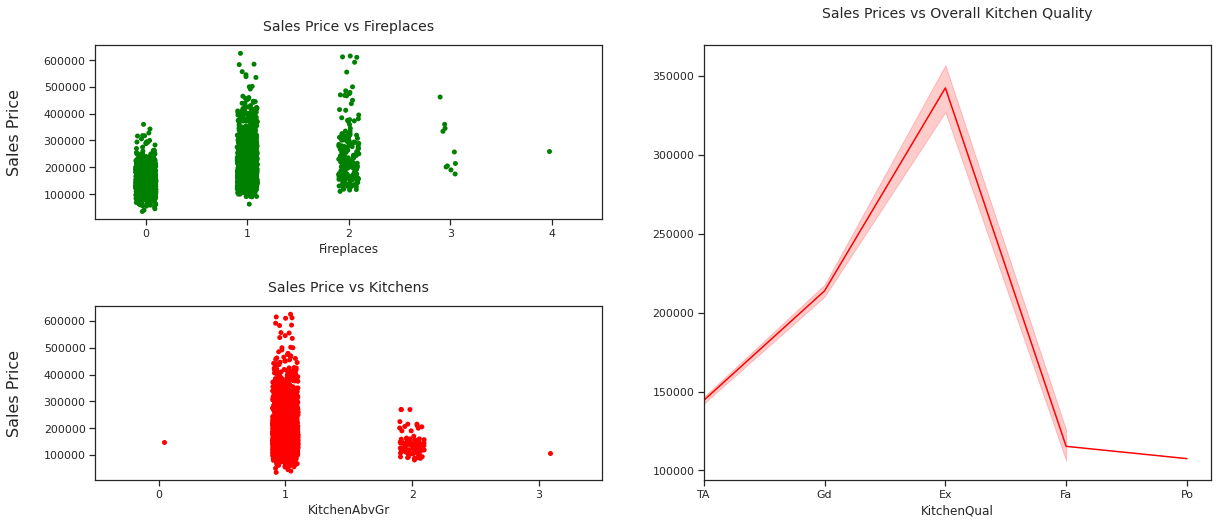

In [ ]:
fig = plt.figure()
sns.set_theme(context='notebook',style='ticks')
fig.subplots_adjust(hspace=0.5, wspace=0.2)
fig.set_figheight(8)
fig.set_figwidth(20)

ax = fig.add_subplot(2, 2, 1)
plt.title("Sales Price vs Fireplaces", y=1.05, fontsize=14)
sns.stripplot(x=ams['Fireplaces'],y=ams['SalePrice'],data=ams, ax=ax, color='green')
ax.set_ylabel('Sales Price\n', fontsize=16)

ax = fig.add_subplot(2, 2, 3)
plt.title("Sales Price vs Kitchens", y=1.05, fontsize=14)
sns.stripplot(x=ams['KitchenAbvGr'],y=ams['SalePrice'],data=ams, ax=ax, color='red')
ax.set_ylabel('Sales Price\n', fontsize=16)
ax = fig.add_subplot(1, 2, 2)
plt.title('Sales Prices vs Overall Kitchen Quality' ,y=1.05, fontsize=14)
sns.lineplot(x=ams['KitchenQual'],y=ams['SalePrice'],data=ams,ax=ax, color='red')
ax.set_xlim(0,None)
ax.set_ylabel('') 
plt.show()

Through this visualisation it is quite clear that kitchens really do influence the market price. The frequency of kitchen does appear to show some correlation in that a kitchen is at least expected in order to increase the Sales potential of the property, however, the real factor is the quality with an excellent style kitchen exponentally increasing the sale price. Likewise, fireplaces show a small linear relationship. Overall amenities do factor into sales prediction however 'luxury' items seem to matter less than expected. The assumption here is that the more of an item you have the greater the price but our data suggests otherwise.

## Neighborhood:

In [3875]:
display(ams['SalePrice'].groupby(ams['Neighborhood']).count().sort_values())
print('\n')
display((ams['SalePrice'].groupby(ams['Neighborhood']).median().sort_values()))
print('/n')

Neighborhood
Greens       8
Blueste     10
Veenker     22
NPkVill     22
MeadowV     23
BrDale      26
Blmngtn     28
SWISU       34
ClearCr     38
StoneBr     50
IDOTRR      58
NoRidge     66
Timber      67
BrkSide     87
Crawfor     96
Mitchel     99
SawyerW    111
NWAmes     117
Sawyer     131
Edwards    137
Gilbert    158
NridgHt    163
Somerst    175
OldTown    185
CollgCr    256
NAmes      389
Name: SalePrice, dtype: int64

Neighborhood
MeadowV     94900.0
BrDale     107000.0
IDOTRR     117450.0
OldTown    123000.0
BrkSide    128500.0
Edwards    130000.0
Blueste    130500.0
Sawyer     135000.0
SWISU      135750.0
NAmes      141500.0
NPkVill    143875.0
Mitchel    157900.0
SawyerW    182000.0
Gilbert    183350.0
NWAmes     185000.0
Blmngtn    191500.0
Greens     198000.0
CollgCr    200070.5
Crawfor    200812.0
ClearCr    218000.0
Somerst    226700.0
Timber     239000.0
Veenker    257500.0
NoRidge    301750.0
NridgHt    317000.0
StoneBr    319450.0
Name: SalePrice, dtype: float64

/n


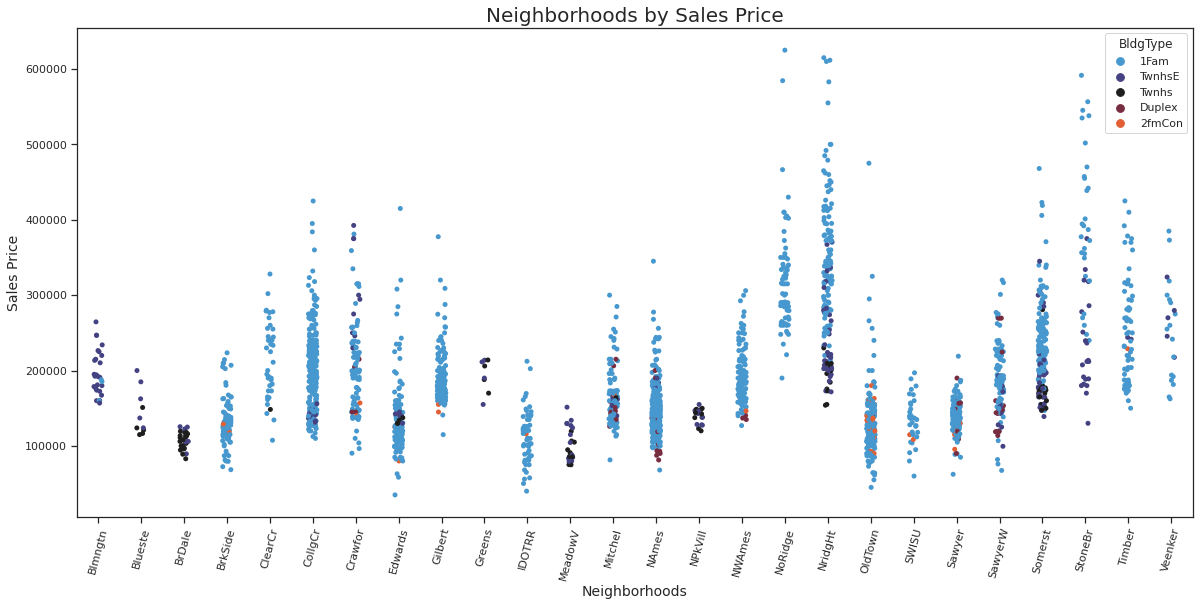

In [ ]:
fig, ax = plt.subplots(figsize=(20,9))
sns.stripplot(x = ams['Neighborhood'], y = ams['SalePrice'], order = np.sort(ams['Neighborhood'].unique()),ax=ax, palette='icefire', hue=ams['BldgType'])
plt.title('Neighborhoods by Sales Price', fontsize=20)
ax.set_ylabel('Sales Price', fontsize=14)
ax.set_xlabel('Neighborhoods', fontsize=14)
plt.xticks(rotation=75)
plt.show()

Clearly, there is a great deal of variation in neighborhoods when looking into SalePrice, perdictably NeigHt and NoRidge seem to suggest their neighborhood is the most desirable on account of the clustering of data points at the higher scales and the max median sale price per neigborhood, however NAmes has almost double the number of occurences. 

Looking at the type of housing, unsurprisingly the single detached property is the standard with the two-family conversion marginally behind. The issue with the neighborhood feature lies in how we can correlate a relationship with such an uneven spread of data and no real pattern of lineary. The frequency differs greatly per neighborhood. We cannot gain much more insight, other than location is of course as important factor when we consider pricing.

# Correlation of target variable to numerical features:

PID                int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemod/Add      int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt        int64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
Bathrooms        float64
dtype: object

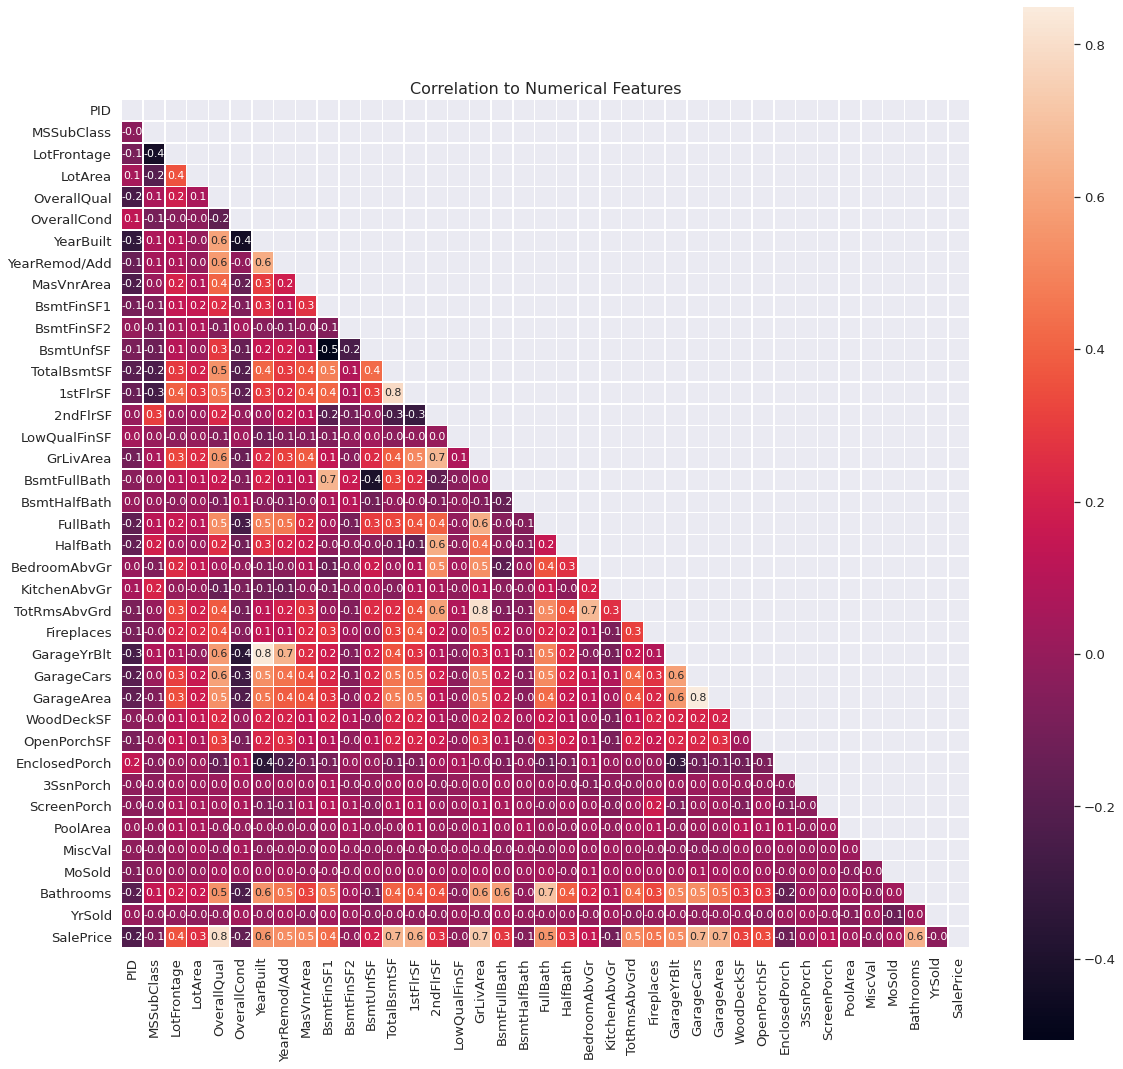

In [ ]:
num_ams = pd.DataFrame(ams.select_dtypes(exclude=['object']))
num_ams.drop(columns='Order', inplace=True)
display(num_ams.dtypes)
col = 'Bathrooms'
bath_col = num_ams.pop(col)
num_ams.insert(36,col, bath_col)

cat_ams = ams.select_dtypes(include=['object'])
con_df = [num_ams,cat_ams]
tot_ams = pd.concat(con_df,axis=1)
corr_ams =num_ams.corr()
sns.set(font_scale=1.2)
mask = np.triu(num_ams.corr())
plt.figure(figsize = (19,19))
plt.title('Correlation to Numerical Features', fontsize=16)
ax = sns.heatmap(corr_ams, annot=True,annot_kws={'size': 11},fmt='.1f', linewidths=.5, square=True, mask=mask)
plt.show()


A large datset causes problems when invesigating relationships within its features. For visualisations and to pick up correlations easily within such a large range of columns [[5]], altering the matrix shape to triangular allows a more readable representation. This can be done by passing the numpy method into a mask, which returns the lower end of the matrix [[6]].

Visualisation has been customised to help understand its contents. The values rather than just colours are displayed to see the varience of correlation between simialarly correlated features, set appropriate font size to fit our matrix, limit to 1 decimal place, square up the plots for more reability and apply our mask to only return the bottom of our correlation matrix.

### Observations gained: 

SalePrice has strong correlation with Overall Qual, Year Built, Total Bsmt SF, 1st Floor SF, Gr Liv Area, FullBath, Garage Cars, Garage Area and Bathrooms.

SalePrice has a moderate correlation with Year Remod/Add, TotalRmsAbvGrd, Fireplaces, and Garage Yr Built. 

High Correlation outwith of our target variables should be explored.

[5]:https://seaborn.pydata.org/generated/seaborn.heatmap.html
[6]:https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

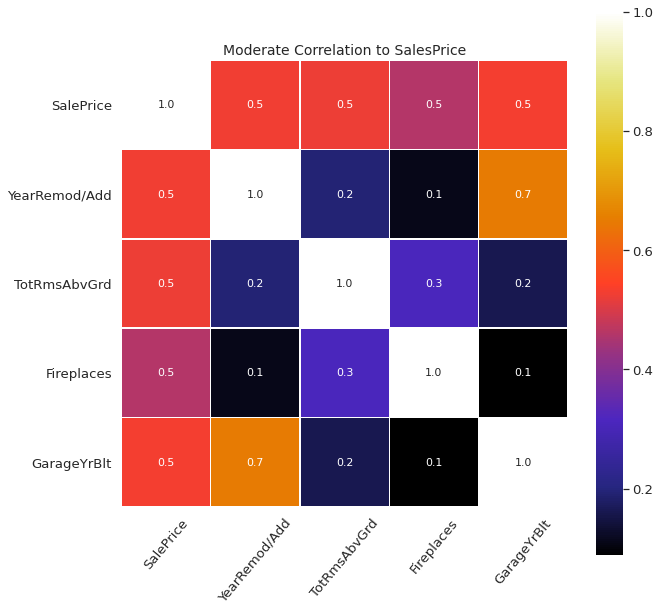

In [ ]:
print('\n')
gd_corr = ams[['SalePrice', 'YearRemod/Add','TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt']]
gd_corr_ams =gd_corr.corr()
sns.set(font_scale=1.2)
plt.figure(figsize = (10,10))
plt.title("Moderate Correlation to SalesPrice", fontsize=14)
plt.xticks(rotation=50)
ax = sns.heatmap(gd_corr_ams, annot=True,annot_kws={"size": 11},fmt='.1f', linewidths=.5, square=True, cmap='CMRmap')
plt.show()

In [3879]:
mc = num_ams[['YearRemod/Add','GarageYrBlt']]
mc.head(10)

,YearRemod/Add,GarageYrBlt
0,1960,1960
1,1961,1961
2,1958,1958
3,1968,1968
4,1998,1997
5,1998,1998
6,2001,2001
7,1992,1992
8,1996,1995
9,1999,1999


## Observations:

Correlation outwith of SalePrice between Year Remod/Add and Garage Yr Built. This could be seen as an indictator for multicollinearity and as such we need to determine whether both pieces of information are required [[7]] [[8]]. Implementing both into our model could cause issues in measuring the individual impact of the variable against our target. Correcting multicollinearity helps avoid any redundancy in modelling as well reduce high standard error [[9]].

Looking at the values, both columns indicate the same thing and as such modelling both would be counter intutive and potentially result in a bias prediction. GarageYrBlt will be removed as it also has a high correlation to YearBuilt, OverallQual, so it is a good feature to remove.

[7]:https://link.springer.com/chapter/10.1007/978-0-585-25657-3_37#:~:text=Multicollinearity%20is%20a%20problem%20because,coefficient%20will%20be%20statistically%20significant.
[8]:https://www.investopedia.com/terms/m/multicollinearity.asp
[9]:https://www.listendata.com/2014/11/detecting-and-correcting.html

In [3880]:
num_ams.drop(columns='GarageYrBlt', inplace=True)
num_ams

,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Bathrooms,YrSold,SalePrice
0,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,5,2.0,2010,215000
1,526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,6,1.0,2010,105000
2,526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,6,1.5,2010,172000
3,526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,4,3.5,2010,244000
4,527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,3,2.5,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,923250060,20,80.0,17400,5,5,1977,1977,0.0,936.0,0.0,190.0,1126.0,1126,0,0,1126,1.0,0.0,2,0,3,1,5,1,2.0,484.0,295,41,0,0,0,0,0,5,3.0,2006,160000
2925,923275080,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,2.0,588.0,120,0,0,0,0,0,0,3,2.0,2006,142500
2926,923276100,20,74.0,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,2.0,484.0,164,0,0,0,0,0,0,6,2.0,2006,131000
2928,924100070,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,2.0,418.0,240,38,0,0,0,0,0,4,2.0,2006,170000


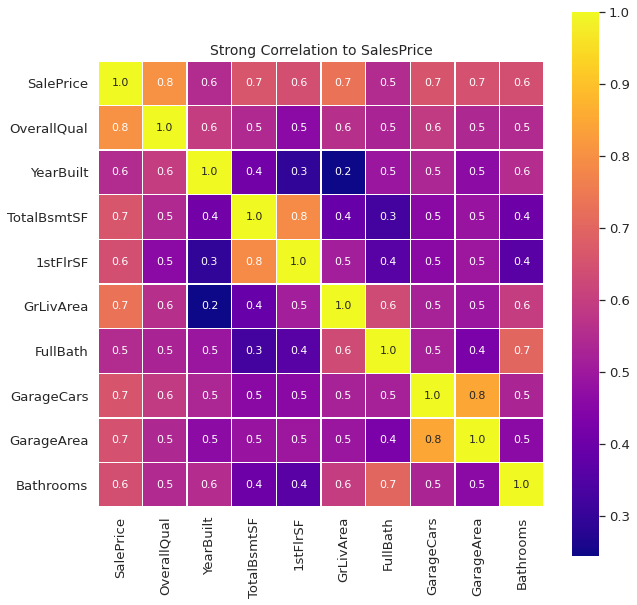

In [ ]:
strng_corr = ams[['SalePrice','OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea','Bathrooms']]
strng_corr_ams =strng_corr.corr()
sns.set(font_scale=1.2)
plt.figure(figsize = (10,10))
plt.title("Strong Correlation to SalesPrice", fontsize=14)
ax = sns.heatmap(strng_corr_ams, annot=True,annot_kws={"size": 11},fmt='.1f', linewidths=.5, square=True, cmap='plasma')

In [3882]:
mc = num_ams[['YearBuilt','OverallQual']]
mc.head(10)

,YearBuilt,OverallQual
0,1960,6
1,1961,5
2,1958,6
3,1968,7
4,1997,5
5,1998,6
6,2001,8
7,1992,8
8,1995,8
9,1999,7


In [3883]:
mc = num_ams[['Bathrooms','GrLivArea']]
mc.head(10)

,Bathrooms,GrLivArea
0,2.0,1656
1,1.0,896
2,1.5,1329
3,3.5,2110
4,2.5,1629
5,2.5,1604
6,3.0,1338
7,2.0,1280
8,3.0,1616
9,2.5,1804


Garage cars and garage area have such a high correlation that we can argue multicollinearity exists. When we look into these two variables this makes sense. The amount of cars a house has is in relation to how large the garage area is, each feature provides the same insight. Garage cars will be used for our model as it has a higher correlation with SalePrice.

we can see Total Bsmt SF and 1st Flr SF have a strong correlation, one insight deduced from the scatterplot was that the basement size and upper floor area are marginally the same so we can drop one variable from our model. Total Bmst SF has a greater correlation with SalePrice so we will keep this.

Our next correlation suggests a problem, YearBuilt and OverallQual, Bathrooms and GrLivArea. This does suggest to be a linear relationship here, however, when we compare the values against each other, they provide a degree of variance. This relationship is logical, the year built links in with the materials used to build the house and the finish. Bathrooms make up the general living area of the house and we see similar correlation when looking at bedrooms however each feature does differ. Due to this observation, these features will remain in the model at the moment.

Our created Bathrooms feature will be selected instead of FullBath as the later is a subset of Bathrooms so its impact has been captured.

In [3884]:
num_ams.drop(['GarageArea','1stFlrSF','FullBath'], axis=1, inplace=True)
num_ams

corr = num_ams.corrwith(ams['SalePrice'])
mask = (corr >= 0.5)
mask
numerical_features = num_ams.loc[:, mask]

# Categorical Feature Correlation to Sales Price:

In [3885]:
cat_ams = pd.DataFrame(ams.select_dtypes(include=['object']))
cat_ams

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,RL,Pave,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,BrkFace,BrkFace,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,RFn,TA,TA,P,WD,Normal
2925,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,BLQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2928,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In its raw form, it can be almost impossible to gain true correlation between categorical variables and continous variables. A way to accomplish this to some degree is through categorical encoding [[10]], in its categorical form, many machine learning models and techniques cannot be applied as such, we need to separate ordinal and non-ordinal variables to apply the appropriate encoding. Simply using One Hot Encoding will result in a large number of features when ordinal features do not require this.

A solution to this problem was understood during the cleaning of the data. Our features contain a ranking system and through this we can encode each to a number.

[10]: https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

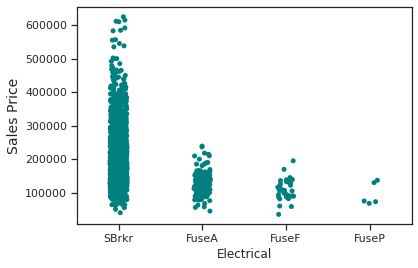

array(['SBrkr', 'FuseA', 'FuseF', 'FuseP'], dtype=object)

In [ ]:
fig = plt.figure()
sns.set_theme(context='notebook',style='ticks')
fig.subplots_adjust(hspace=0.5, wspace=0.2)

ax = fig.add_subplot()
sns.stripplot(x=ams['Electrical'],y=ams['SalePrice'],data=ams, ax=ax, color='teal')
ax.set_ylabel('Sales Price', fontsize=14)
plt.show()
print('\n')
ams.Electrical.unique()

Check to see how electrical relates to Sales Price to ensure accurate encoding.

In [3887]:
ams = ams.replace({'BsmtExposure' : {'None': 'No'}})
BsmtQual = ['None','Po','Fa','TA','Gd','Ex'] 
Utilities =['ELO','NoSeWa','NoSewr','AllPub']
BsmtCond = ['None','Po','Fa','TA','Gd','Ex']
LandSlope = ['Sev','Mod','Gtl']
ExterQual = ['Po','Fa','TA','Gd','Ex']
ExterCond = ['Po','Fa','TA','Gd','Ex']
BsmtExposure = ['No','Mn','Av','Gd']
BsmtFinType1 = ['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
BsmtFinType2 = ['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
HeatingQC =  ['Po','Fa','TA','Gd','Ex']
Electrical = ['FuseP','FuseF','FuseA','Mix','SBrkr']
KitchenQual = ['Po','Fa','TA','Gd','Ex']
Functional = ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']
GarageFinish = ['None','Unf','RFn','Fin']
GarageQual = ['None','Po','Fa','TA','Gd','Ex']
GarageCond = ['None','Po','Fa','TA','Gd','Ex']
PavedDrive = ['N','P','Y']
FireplaceQu = ['None','Po','Fa','TA','Gd','Ex']

mask = ['BsmtQual','Utilities','BsmtCond','LandSlope','ExterQual','ExterCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical',
        'KitchenQual','Functional','GarageFinish','GarageQual','GarageCond','PavedDrive','FireplaceQu']

cat2_ams = ams[mask]
test_ams = ams[mask]

# define ordinal encoding
encoder = OrdinalEncoder(categories=[BsmtQual, Utilities,BsmtCond,LandSlope,ExterQual,ExterCond, BsmtExposure,BsmtFinType1,BsmtFinType2, HeatingQC,Electrical
                         ,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,FireplaceQu])
encoder
result = encoder.fit_transform(cat2_ams)
display(cat2_ams)
# transform data
cat2_ams = pd.DataFrame(encoder.fit_transform(cat2_ams),columns=mask)

,BsmtQual,Utilities,BsmtCond,LandSlope,ExterQual,ExterCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,FireplaceQu
0,TA,AllPub,Gd,Gtl,TA,TA,Gd,BLQ,Unf,Fa,SBrkr,TA,Typ,Fin,TA,TA,P,Gd
1,TA,AllPub,TA,Gtl,TA,TA,No,Rec,LwQ,TA,SBrkr,TA,Typ,Unf,TA,TA,Y,None
2,TA,AllPub,TA,Gtl,TA,TA,No,ALQ,Unf,TA,SBrkr,Gd,Typ,Unf,TA,TA,Y,None
3,TA,AllPub,TA,Gtl,Gd,TA,No,ALQ,Unf,Ex,SBrkr,Ex,Typ,Fin,TA,TA,Y,TA
4,Gd,AllPub,TA,Gtl,TA,TA,No,GLQ,Unf,Gd,SBrkr,TA,Typ,Fin,TA,TA,Y,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,TA,AllPub,TA,Mod,TA,TA,No,ALQ,Unf,Fa,SBrkr,TA,Typ,RFn,TA,TA,P,Gd
2925,TA,AllPub,TA,Gtl,TA,TA,Av,GLQ,Unf,TA,SBrkr,TA,Typ,Unf,TA,TA,Y,None
2926,Gd,AllPub,TA,Mod,TA,TA,Av,BLQ,ALQ,TA,SBrkr,TA,Typ,Unf,TA,TA,Y,None
2928,Gd,AllPub,TA,Mod,TA,TA,Av,ALQ,LwQ,Gd,SBrkr,TA,Typ,RFn,TA,TA,Y,TA


In [3888]:
cat_ams = pd.DataFrame(ams.select_dtypes(include=['object']))
cat_ams

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,RL,Pave,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,BrkFace,BrkFace,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,RFn,TA,TA,P,WD,Normal
2925,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,BLQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2928,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


Using OrdinalEncoder rather than other encoding methods [[11]] rather than iterating via a list can result in missing information in the importance of their order. The consequence of this is the learning model may misinterpret a relationship, Ex is seen as less than Po for example, which is why there was a need to specify each category passed into the encoder.[[10]]. The other categorical features will be encoding via one hot encoding (pd.getdummies()).

[10]:https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
[11]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [3889]:
for i in cat_ams:
    dummies = pd.get_dummies(cat_ams[i], drop_first=True)
    dummies.columns = str(i) +'_'+ dummies.columns
    cat_ams = pd.concat([cat_ams,dummies],axis=1)
    cat_ams.drop(i,axis=1,inplace=True)
cat_ams

,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,...,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2925,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2926,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2928,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0


Use of pandas get_dummies as a method of one hot encoding, limitation of multicollinearity through drop_first, which removes the first instance of every encoder dummy [[10]].

[10]:https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

# Preparation for modelling:

Features have been transformed to numerical features using encoding and other EDA techniques. When modelling, we should attempt to remove all possible outliers as well skewed as data which can result in a lack of linearity which is a core component required to undertake a linear regression model. For our key variable we can reduce skew and introduce scability without compromising the data structure. [12]*italicised text*

In [3890]:
categorical_features = pd.concat([cat_ams,cat2_ams], axis=1)
categorical_features.isnull().sum()
ams = pd.concat([categorical_features, numerical_features], axis=1)
ams.dropna(inplace=True)
ams.isnull().sum().sum()

0

combine our categorical and numerical features into our main model ams. Any nulls as a result of the concatenation are dropped and a NA check is made.

In [3891]:
df = pd.DataFrame(data = feature_list.loc[:,"SalePrice"])
for col in df.columns:
  col_zscore = col + '_zscore'
  df[col_zscore] = (df.loc[:,col] - df.loc[:,col].mean())/df.loc[:,col].std(ddof=0)  
df['Outliers'] = (abs(df['SalePrice_zscore'])>3).astype('int64')

sp_mask = df.loc[(df['Outliers'] == 1)].index
sp_mask
display(feature_list.shape)
feature_list.drop(sp_mask, inplace=True)
display(feature_list.shape)

(2126, 231)

(2126, 231)

Removal of outliers using the stastical zscore [[13]] , any values outwith of 3 standard deviations of the mean are placed into a mask and removed from ams [[14]].

[13]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html
[14]: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [ ]:
ams["SalePrice"] = np.log1p(ams["SalePrice"])

fig = plt.figure()
plt.title('Sales Price Log Transformation', fontsize=16)
fig.set_figheight(8)
fig.set_figwidth(17)
sns.set_theme(context='notebook',style='ticks')
sns.histplot(ams['SalePrice'], kde=True, color='darkblue')
plt.xlabel('Sales Price')
sns.despine()
plt.show()

print('Positive Skew:', ams['SalePrice'].skew())
print('Kurtosis/Peak:', ams['SalePrice'].kurtosis())

Target variable undergoes normalisation using log transformation (function is applied to each value). This is a method to normalise positively skewed features.[[13]] [[14]]

Important point to note: In the dataset descriptor, the creator of the challenge recommends that when considering a predictive model, instances that fall outwith of the typical standards should be removed which was done when we removed the atypical occurences of SalesCondition. The removal of outliers affected the log transformation of our target variable.

[15]: Alternatively, if the purpose is to once again create a common use model to estimate a “typical” sale, it is in the modeler’s best interest to remove any observations that do not seem typical (such as foreclosures or family sales).

[13]: https://numpy.org/doc/stable/reference/generated/numpy.log1p.html[
[14]: https://www.geeksforgeeks.org/numpy-log1p-python/
[15]: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

# Conclusion:

To summarise our exploration into the AMES housing dataset, we have explored the relationships between key features and our target variable. We have performed an intital feature selection for modelling.

Some insights made:

Our intital estimates proved to be accurate when looking at factors affecting the sales price.

1.   Rules of logic such as pricing increases per square foot apply and are confirmed through the visualisations. 
2.   Quality matters significantly more than conditioning, athough as mentioned before, understanding the mechanism would allow greater understanding in this area.
1. Amenities definitely matter though surprisingly less so as the quantity increases, 'luxury items' are less impactful than expected. An overwhelming insight was the strong correlation to Kitchen quality which skyrockets the pricing of housing when the quality is excellent and is expected to be a main contributor when measuring feature impacts. A boolean feature representing isKitchEx could be more impactful.
2. Neighborhood(location) is a difficult factor to consider. It is clear there is some impact in resulting areas but the categorical nature prevents real insight being made. It is expected that modelling prediction will highlight encoded areas of Neighborhood as a key impactor to the sales price.

